# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
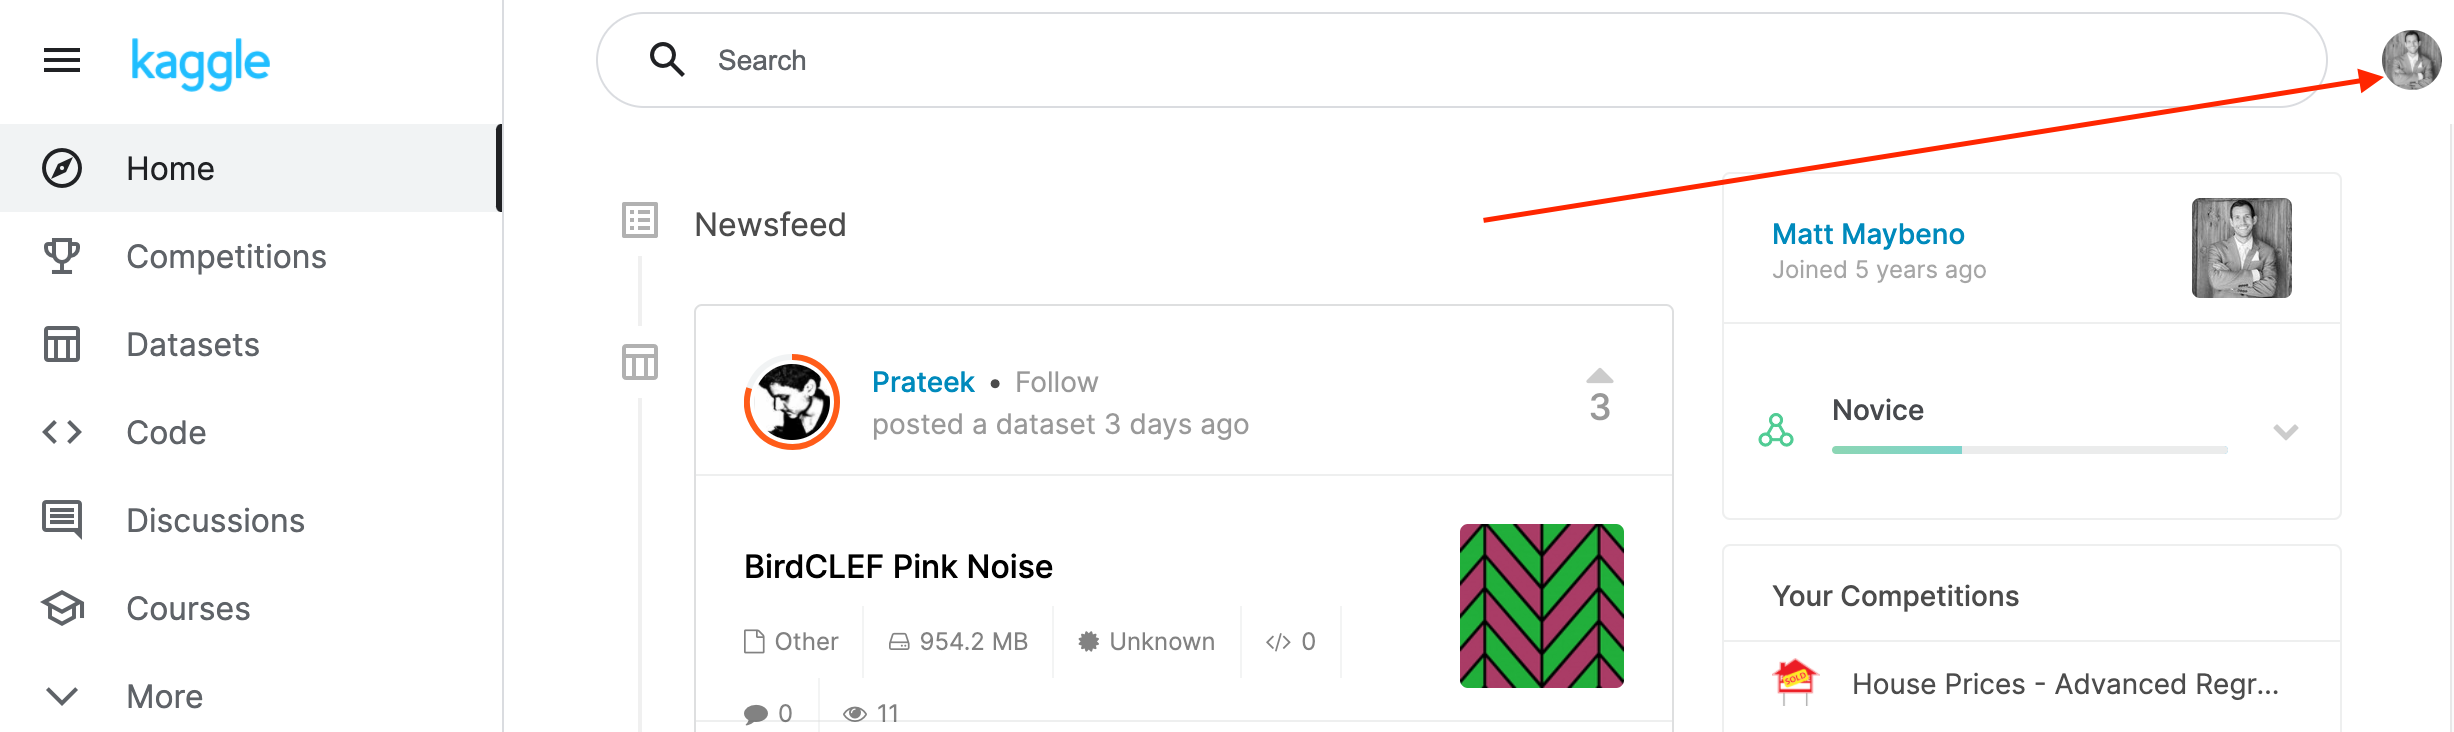
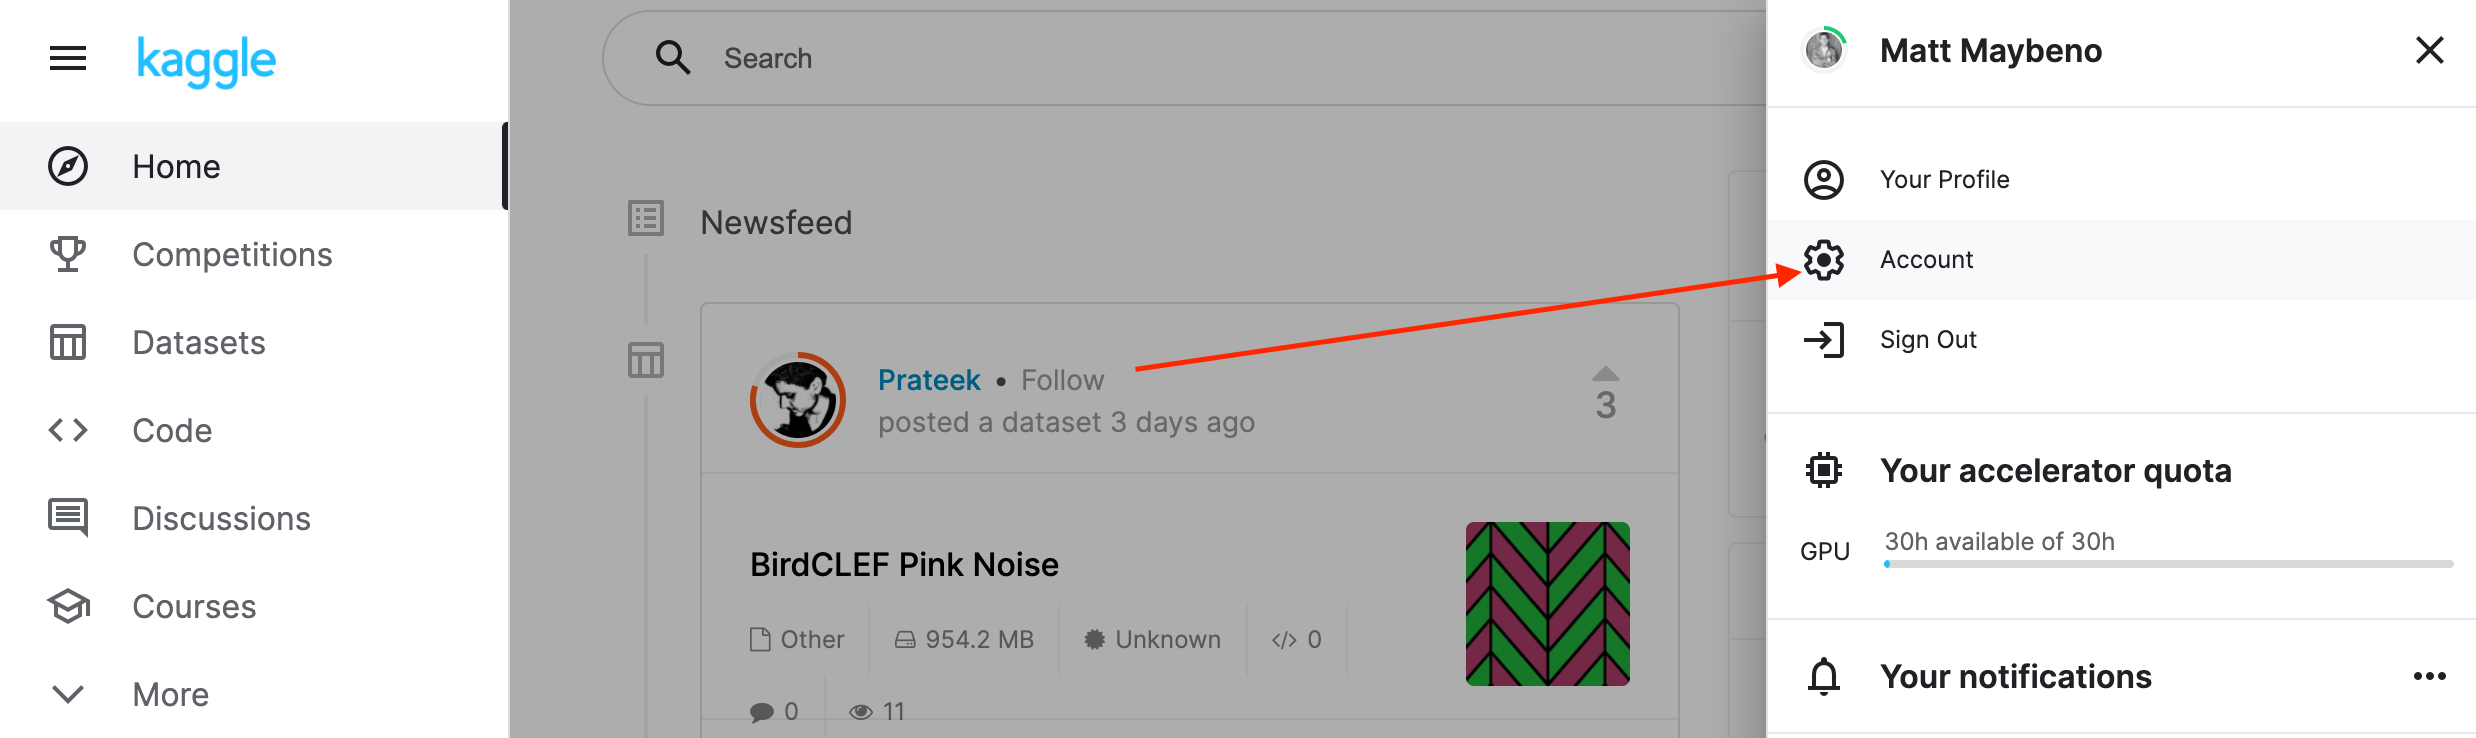
2. Scroll down to API and click Create New API Token.
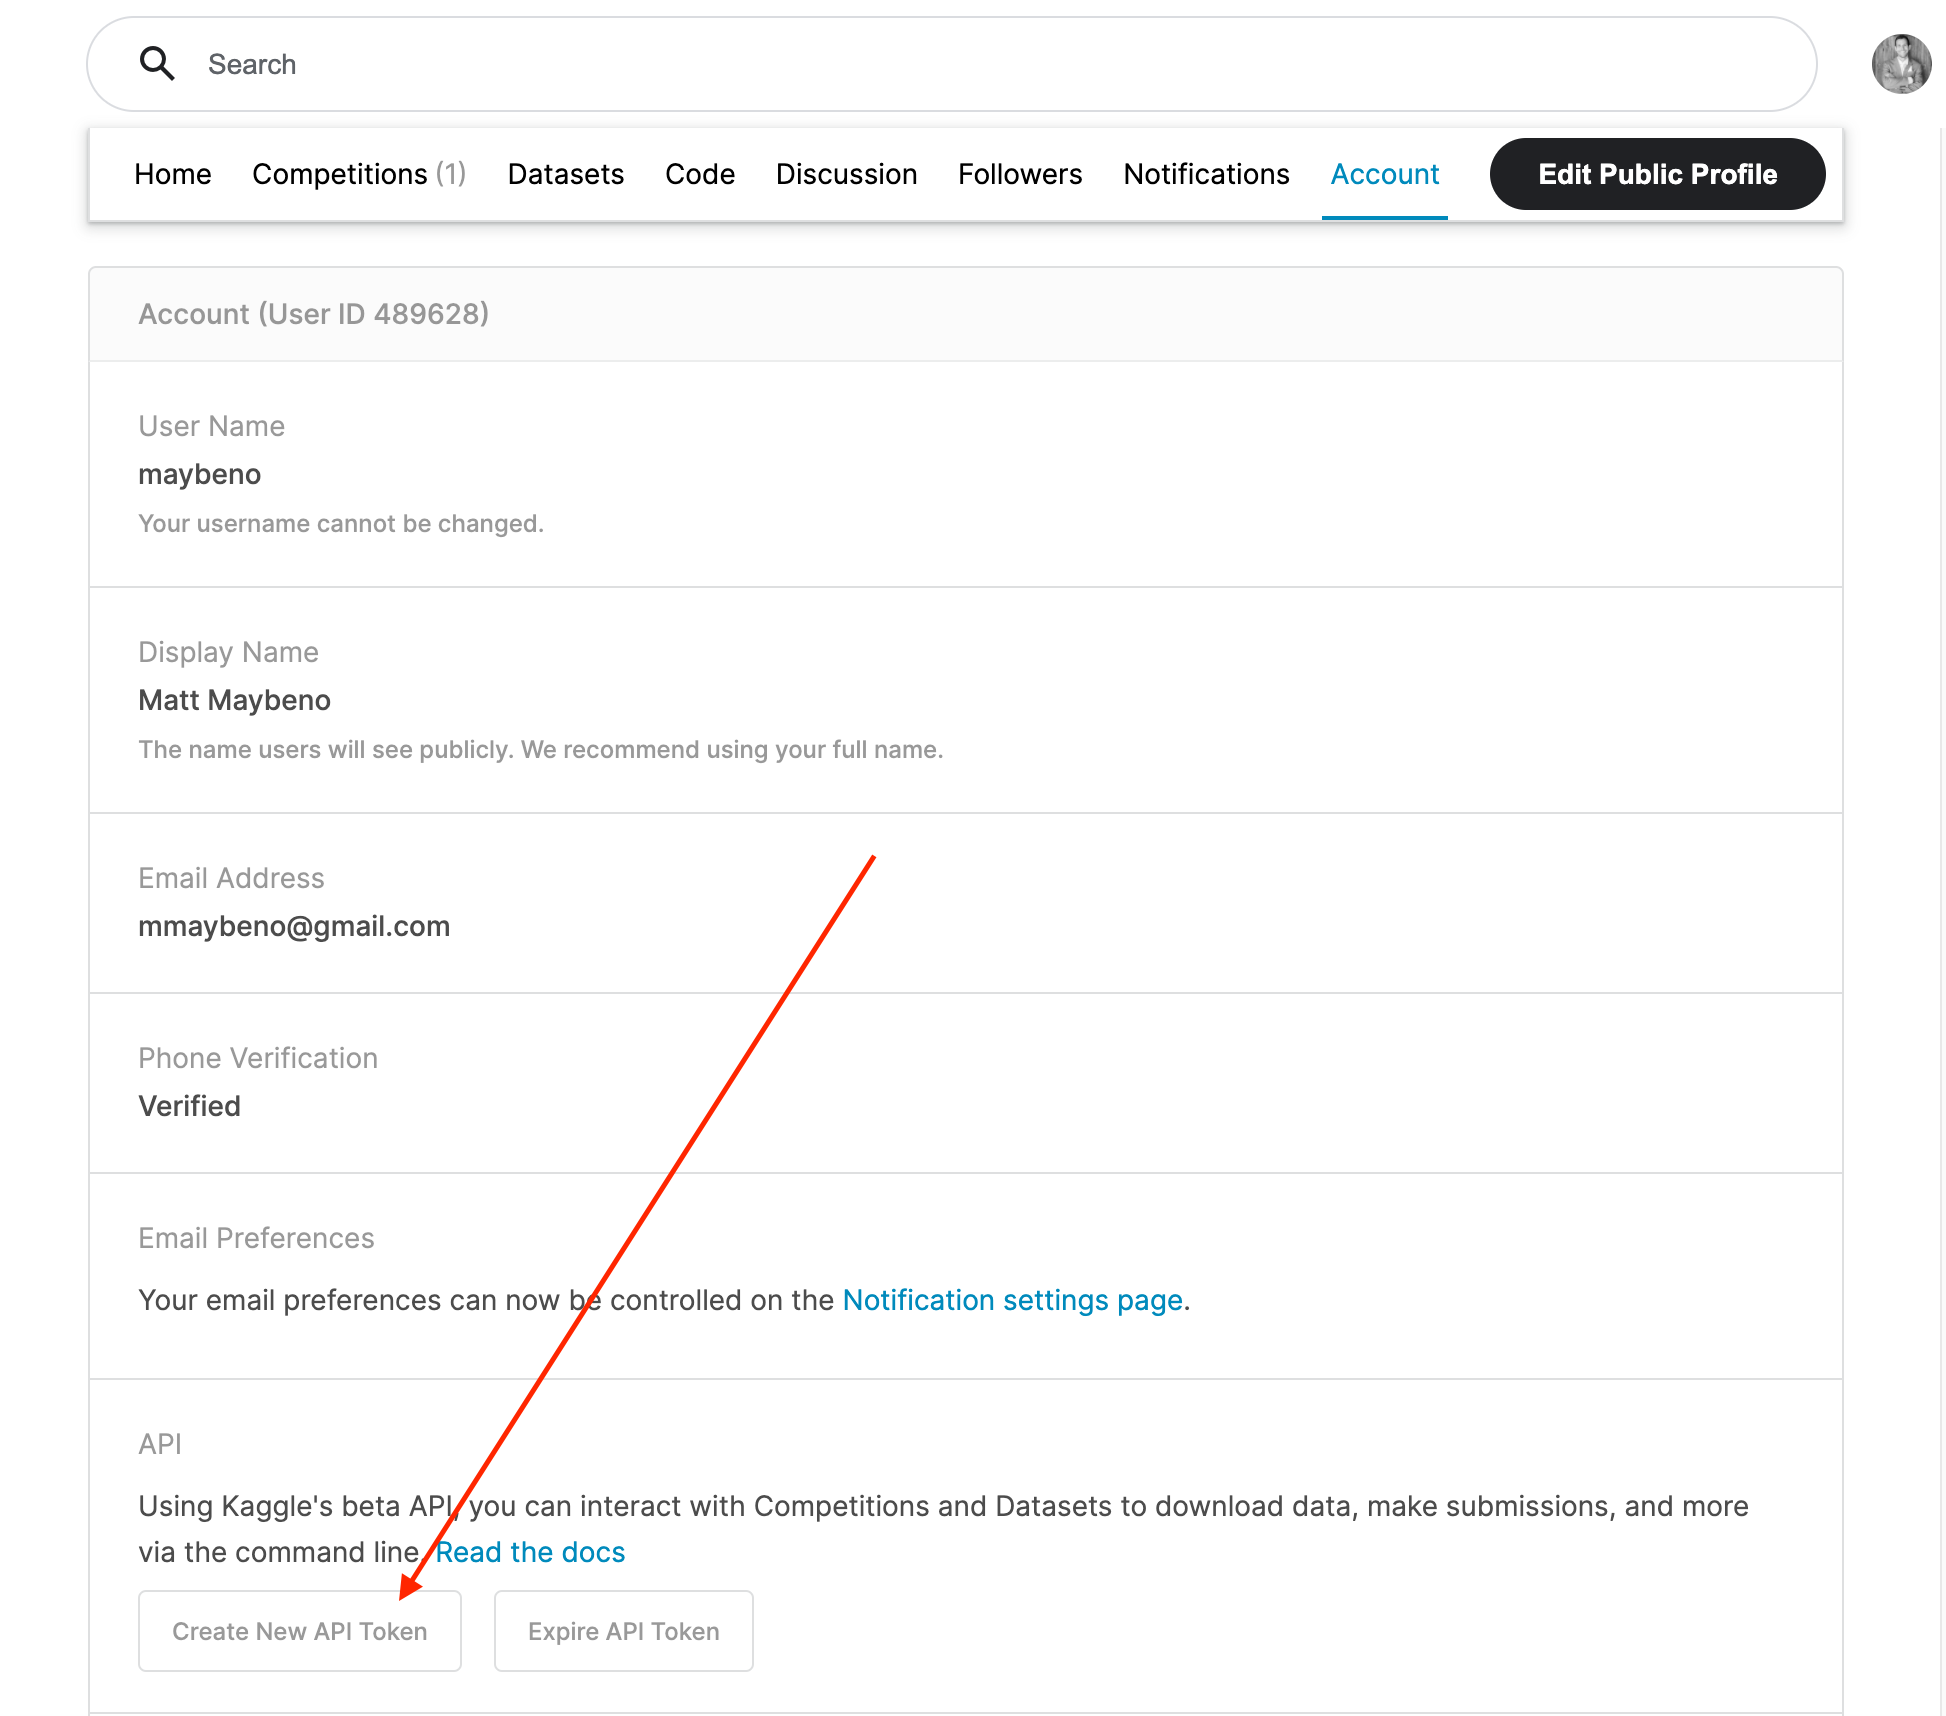
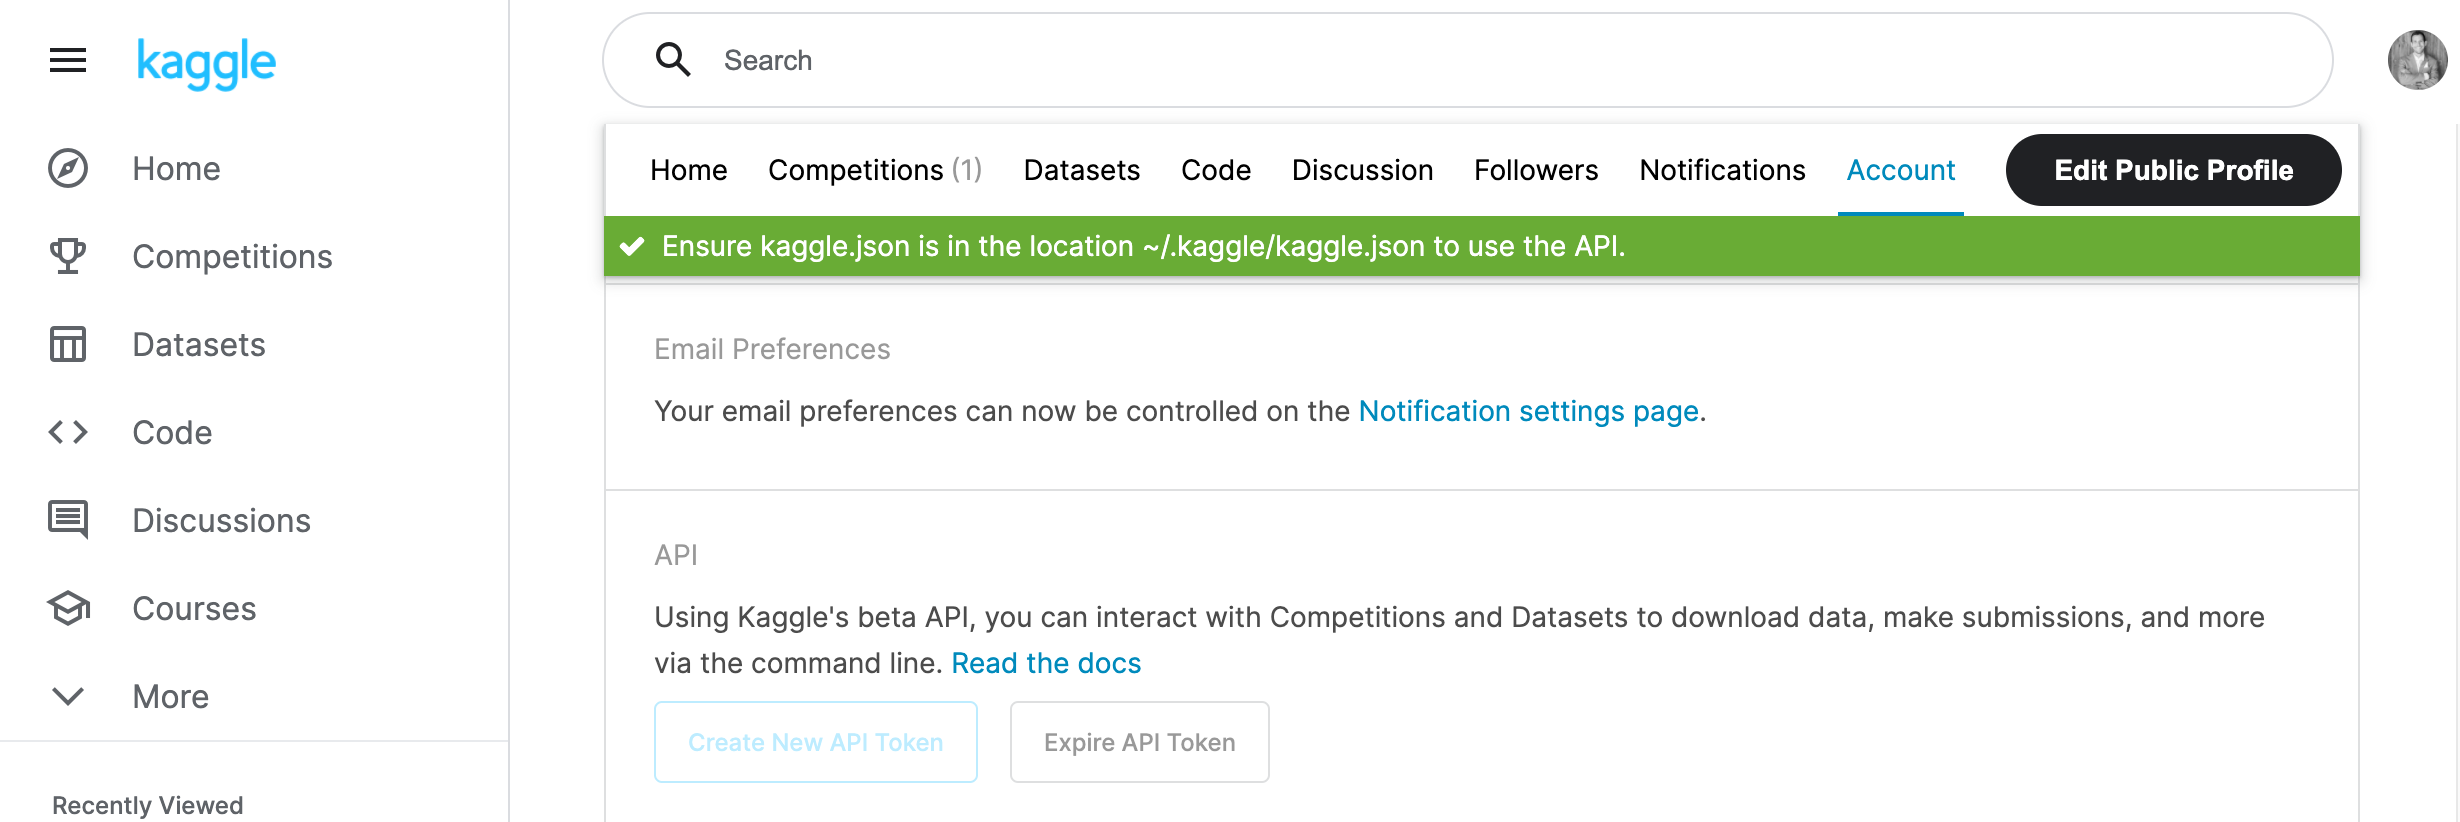
3. Open up `kaggle.json` and use the username and key.
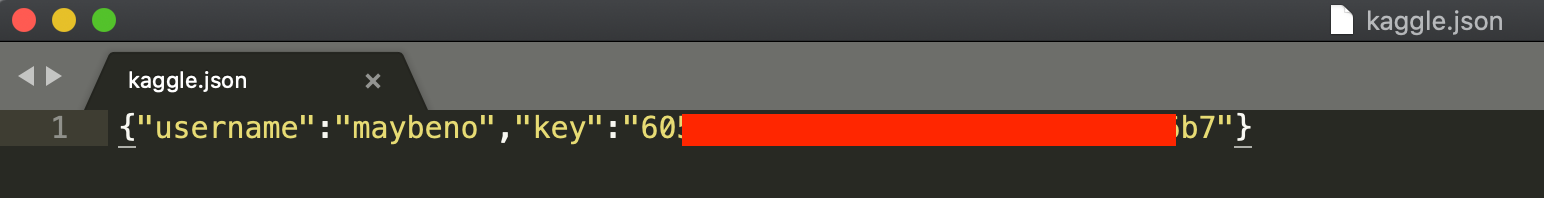

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
#!pip install -U pip
#!pip install -U setuptools wheel
#!pip install -U "mxnet<2.0.0" bokeh==2.0.1
#!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1902 lines of output]
      Running from numpy source directory.
      C:\Users\amor_\AppData\Local\Temp\pip-install-h0d09eje\numpy_1d93500972a84b80855ab8399c8dcc6a\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\libs']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distu

### Setup Kaggle API Key

In [14]:
#pip install kaggle

                                              0.0/63.3 kB ? eta -:--:--
     ---------------------------------------- 63.3/63.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77729 sha256=9cf3f03e6be612116849d5b074093d0c1298afa6782ef430bcd1fc8e651a2b3c
  Stored in directory: c:\users\amor_\appdata\local\pip\cache\wheels\f3\16\ff\34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
import kaggle

In [17]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [20]:
api = KaggleApi()
api.authenticate()

In [22]:
api.competition_download_file("bike-sharing-demand", 
                              "sampleSubmission.csv")

100%|██████████| 140k/140k [00:00<00:00, 809kB/s]

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
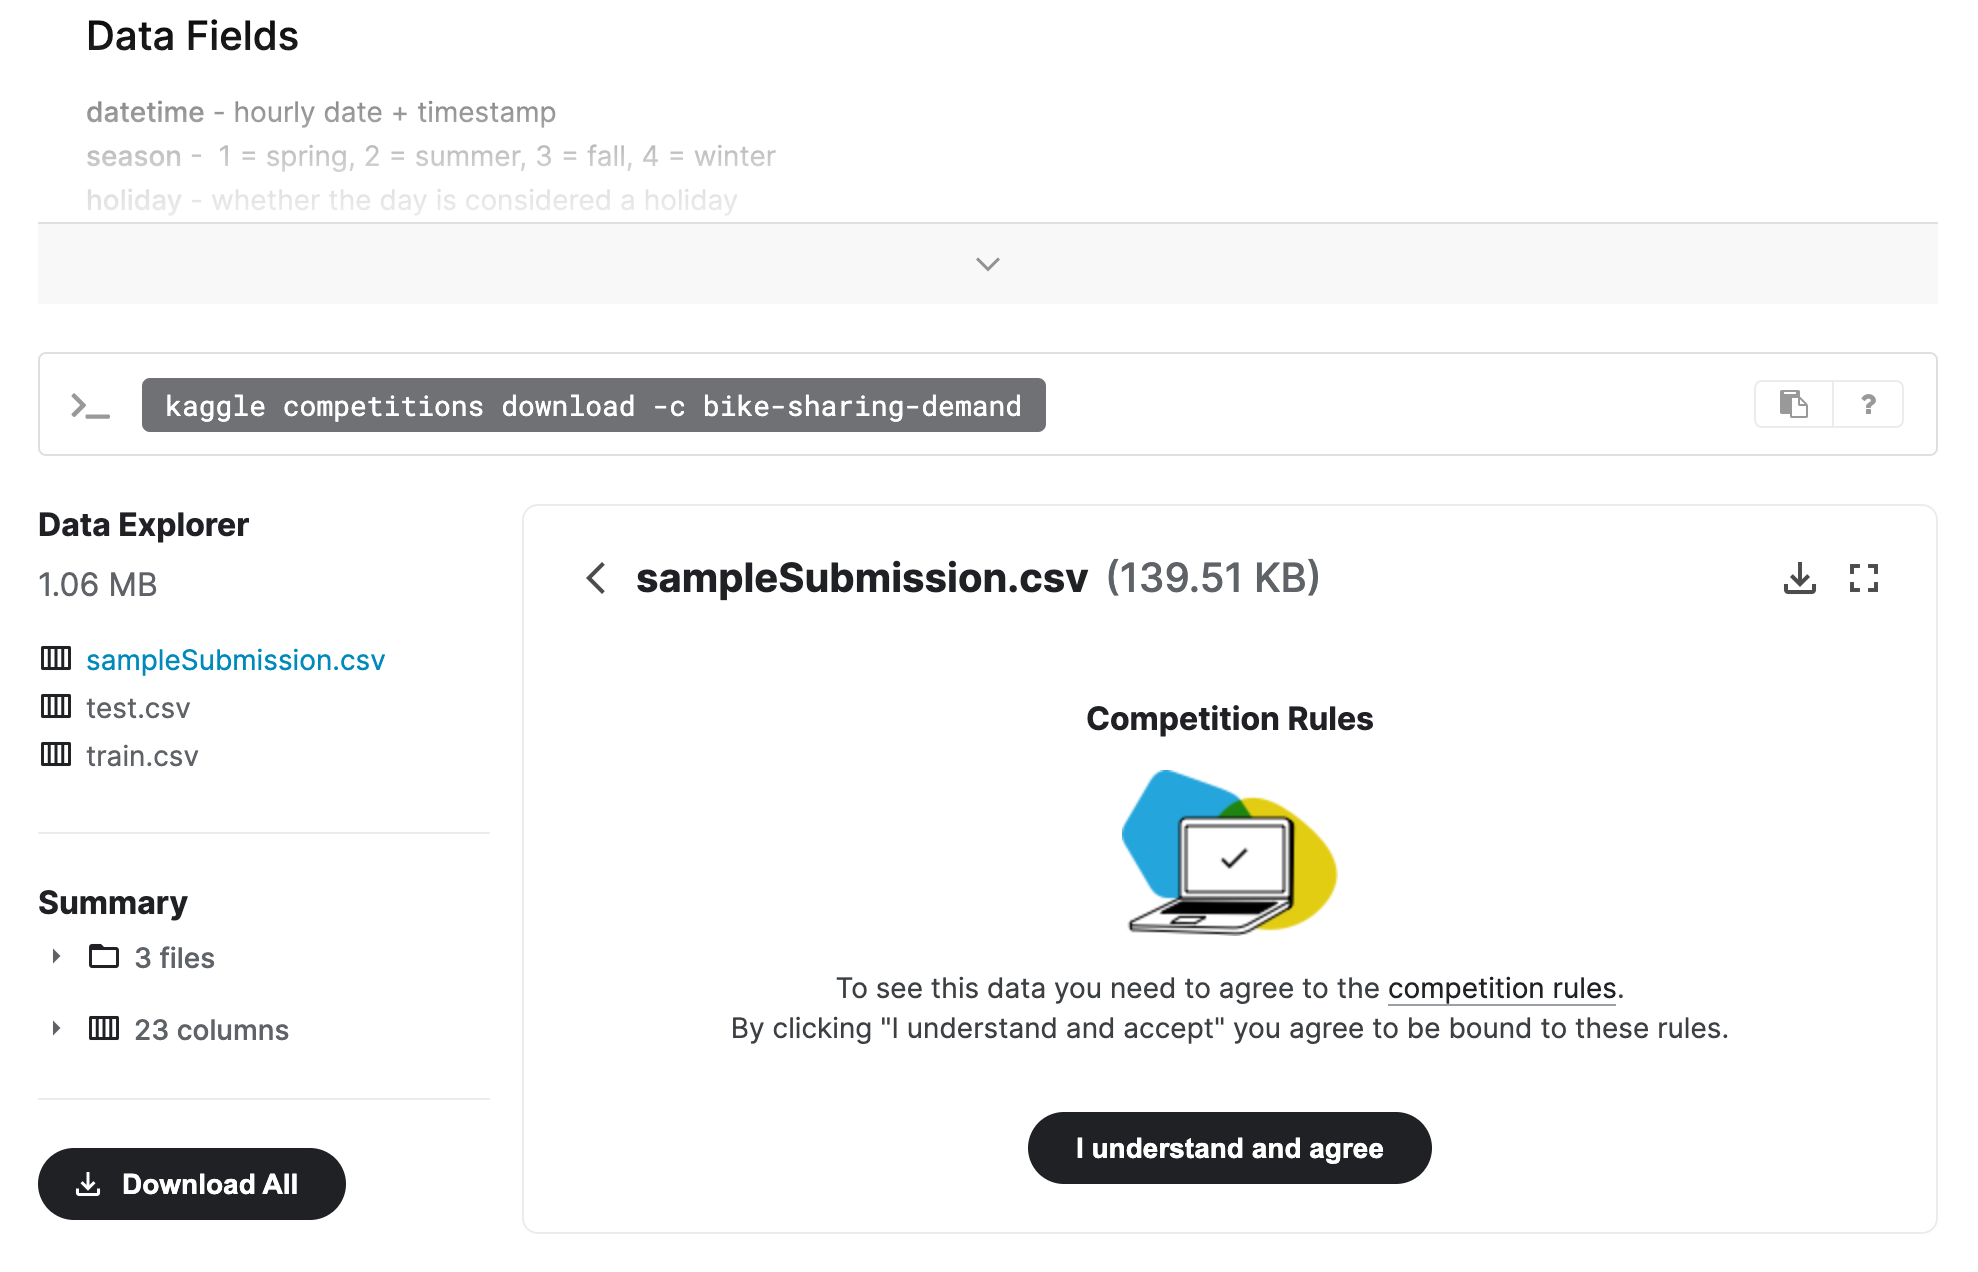

In [26]:
api.competition_download_file("bike-sharing-demand", "test.csv")
api.competition_download_file("bike-sharing-demand", "train.csv")

100%|██████████| 316k/316k [00:00<00:00, 1.37MB/s]


100%|██████████| 633k/633k [00:00<00:00, 1.66MB/s]

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

C:\Users\amor_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [7]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [8]:
predictor = TabularPredictor(label = 'count', 
                             eval_metric='root_mean_squared_error',
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
                                                                                               time_limit=600, 
                                                                                               presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230530_191512\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230530_191512\"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to pre

### Review AutoGluon's training run with ranking of models that did the best.

In [9]:
predictor.fit_summary()

C:\Users\amor_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -52.549823       3.588378  14.458513                0.001000           0.279320            3       True          8
1    ExtraTreesMSE_BAG_L2  -53.164395       2.641854   7.681386                0.896699           2.405626            2       True          7
2  RandomForestMSE_BAG_L2  -53.187018       2.690679  11.773567                0.945524           6.497808            2       True          6
3   KNeighborsDist_BAG_L1  -84.146423       0.044750   0.061951                0.044750           0.061951            1       True          2
4     WeightedEnsemble_L2  -84.146423       0.045742   0.388612                0.000991           0.326661            2       True          5
5   KNeighborsUnif_BAG_L1 -101.588176       0.043565   0.069514                0.04356

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'RandomForestMSE_BAG_L1': -116.55209143577434,
  'ExtraTreesMSE_BAG_L1': -124.60230209225125,
  'WeightedEnsemble_L2': -84.14642264302962,
  'RandomForestMSE_BAG_L2': -53.187018324854016,
  'ExtraTreesMSE_BAG_L2': -53.16439524550508,
  'WeightedEnsemble_L3': -52.54982338728797},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels\\ag-20230530_191512\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeig

<Axes: xlabel='model'>

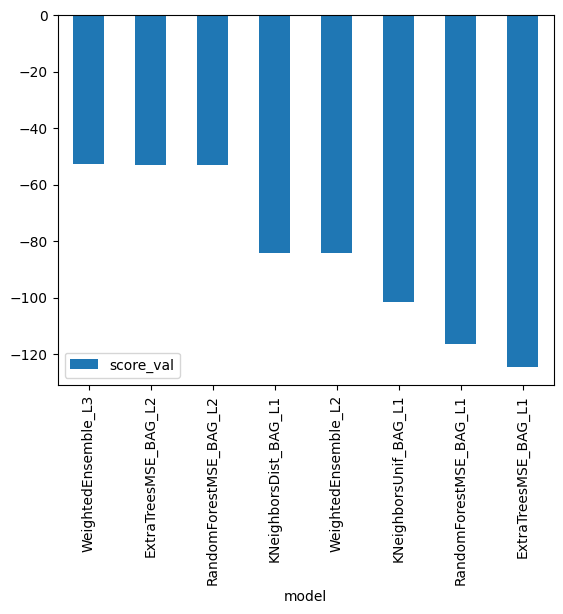

In [10]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [11]:
predictions = predictor.predict(test)
predictions.head()

0    21.875324
1    40.775326
2    46.401787
3    48.398968
4    51.721954
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [12]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.124626
std        90.543274
min         2.349966
25%        18.697525
50%        62.859482
75%       169.989685
max       363.852570
Name: count, dtype: float64

In [13]:
# How many negative values do we have?
negative_count = len([prediction for prediction in predictions if prediction < 0])
negative_count

0

In [14]:
# Set them to zero
#There is 0 values negatives so I don't need to tranform them but just in case here there is the way to do it
#predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [15]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [16]:
#!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [17]:
#!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### Initial score of `1.84216`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [18]:
#Separate datetime into hour, day, month and year
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

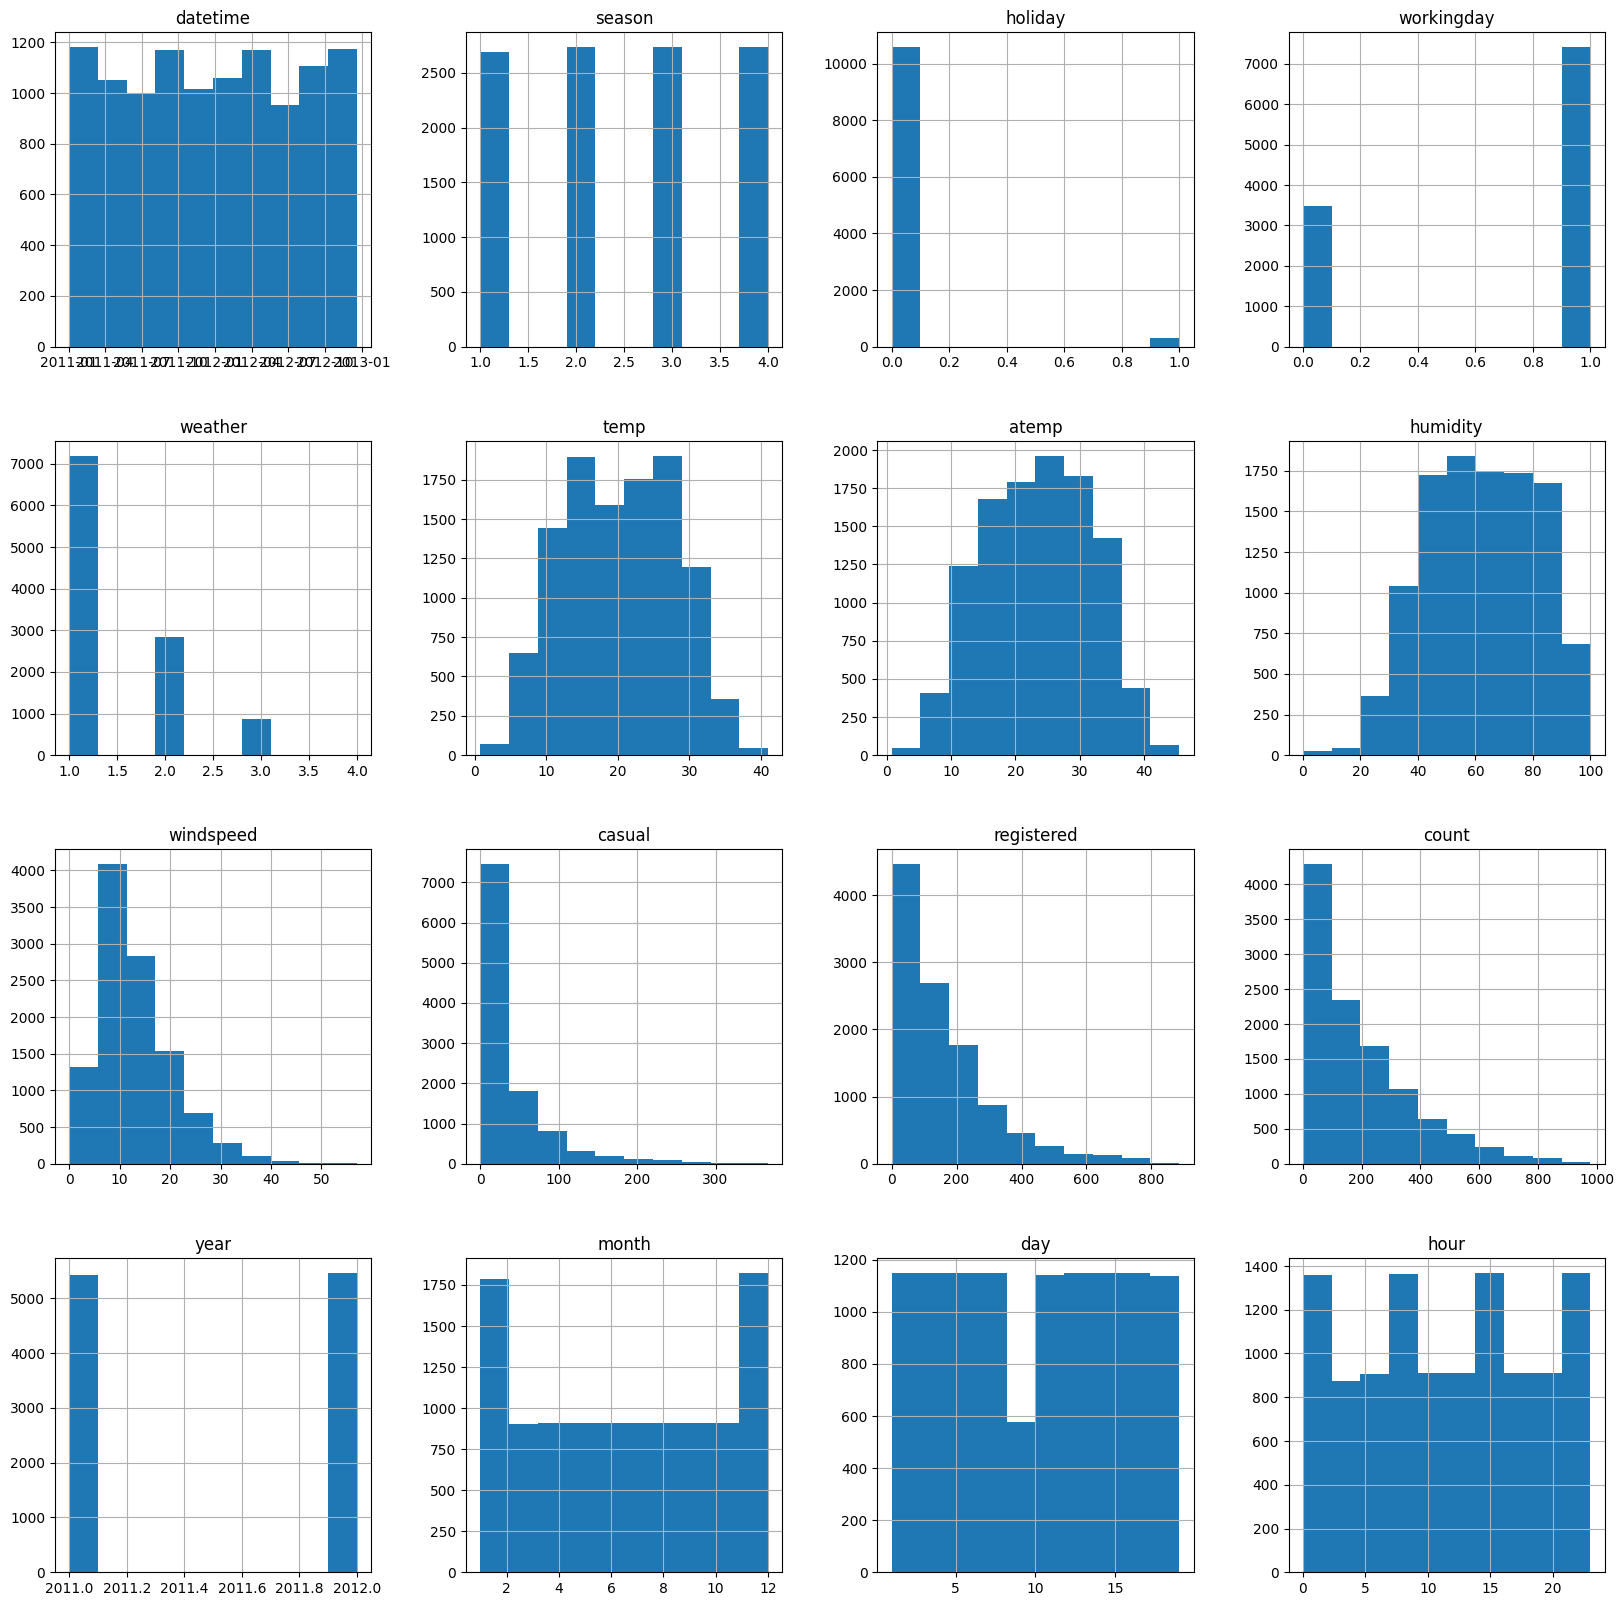

In [19]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (20, 20))

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [20]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [21]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

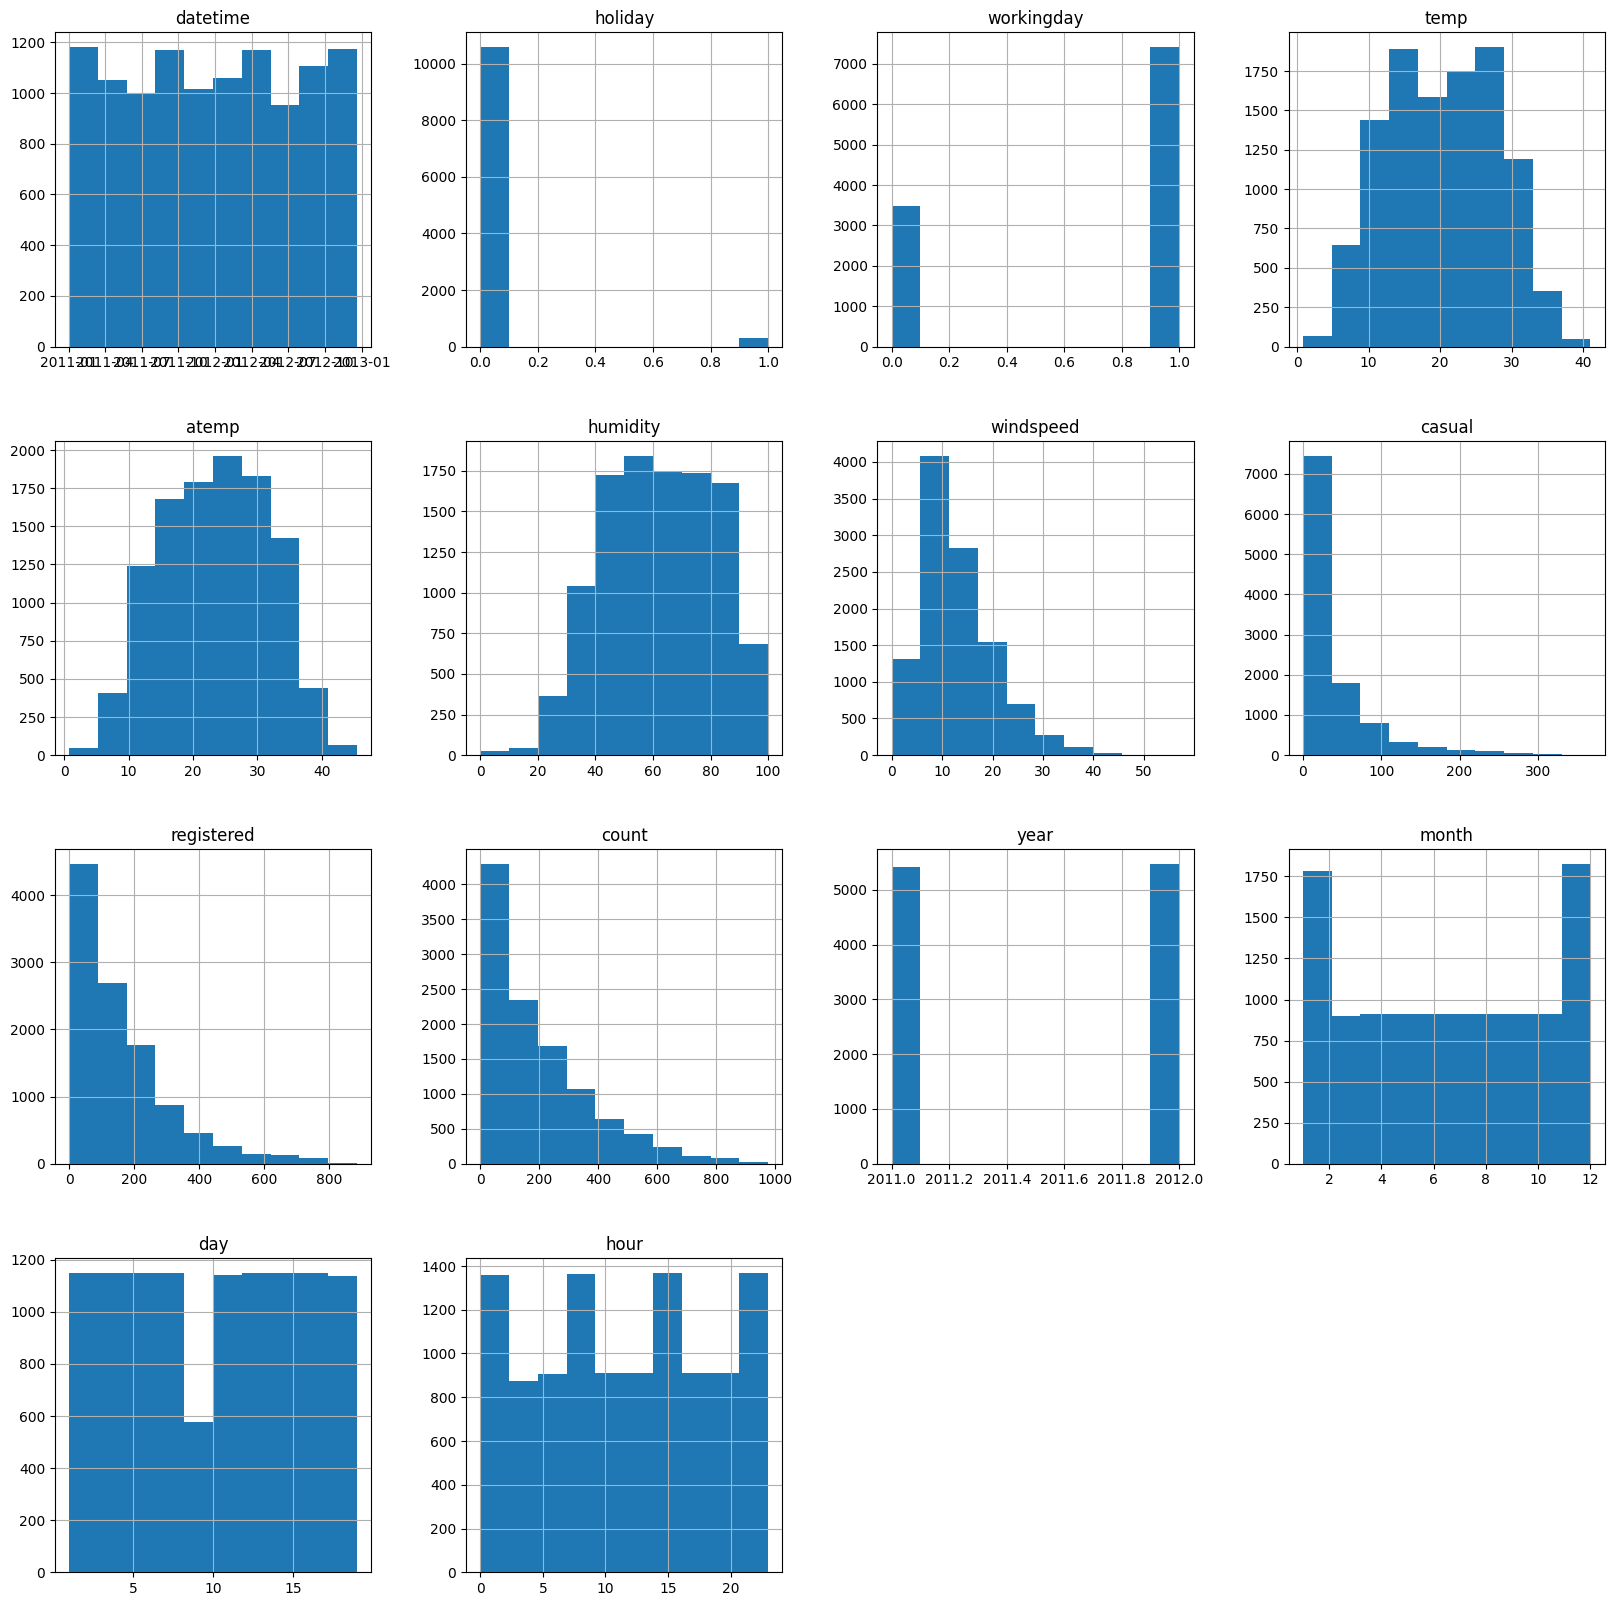

In [22]:
# View histogram of all features again now with the hour feature
train.hist(figsize = (20, 20))

### Correlation matrix

In [23]:
#pip install seaborn

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
train_quant = train[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

In [26]:
corr = train_quant.corr()

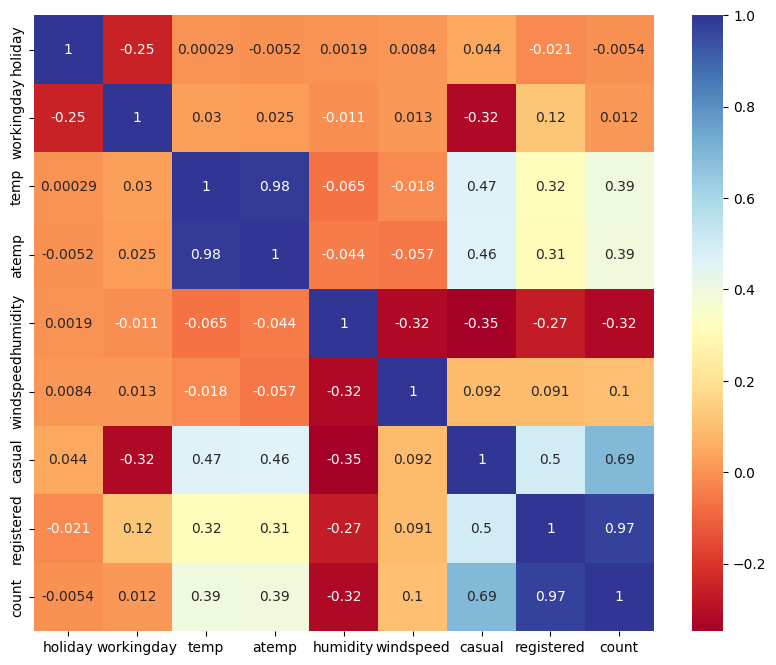

In [27]:
plt.figure(figsize=(10,8)) # specify the size of the figure
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True,   # write the data value in each cell
            cmap='RdYlBu') # specify the color of the heatmap
plt.show()

The key observations are:
* temp and atemp are highly positively correlated (coefficient close to 1). This makes sense as atemp is likely the "feels like" temperature, which is generally closely related to the actual temperature.
* count (presumably the count of total bike rentals) has a strong positive correlation with registered (coefficient close to 1), indicating that registered users contribute significantly to the total count.
* count also has a fairly strong positive correlation with casual (coefficient of 0.690414), meaning that casual users also contribute to the total count but not as much as registered users.
* humidity and windspeed show a strong negative correlation (coefficient of -0.318607), indicating that generally, lower humidity levels might be associated with higher wind speeds.
* Both casual and registered show negative correlations with workingday, suggesting that there are fewer bike rentals on working days for both user types.

### Time series of bike rentals demand

In [28]:
train_series = train.copy()

In [37]:
train_series.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [29]:
train_series.set_index('datetime', inplace=True)

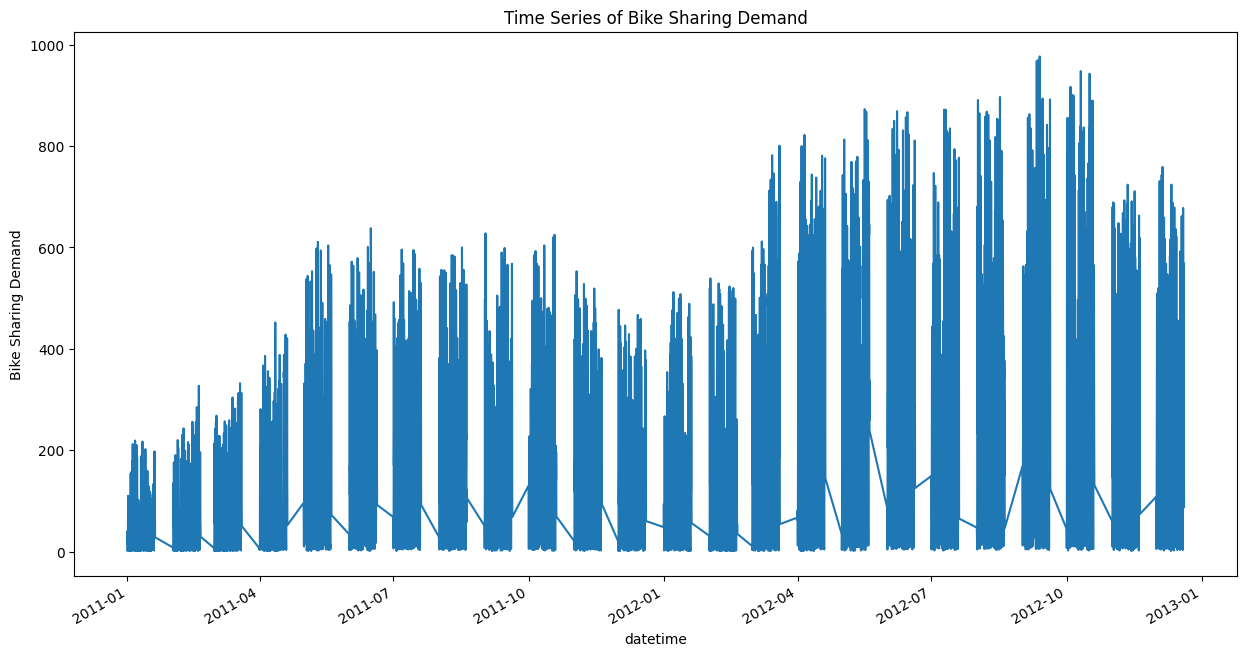

In [30]:
plt.figure(figsize=(15,8))
train_series['count'].plot()
plt.ylabel('Bike Sharing Demand')
plt.title('Time Series of Bike Sharing Demand')
plt.show()

In [38]:
train_series_2012 = train_series[train_series['year'] == 2012]

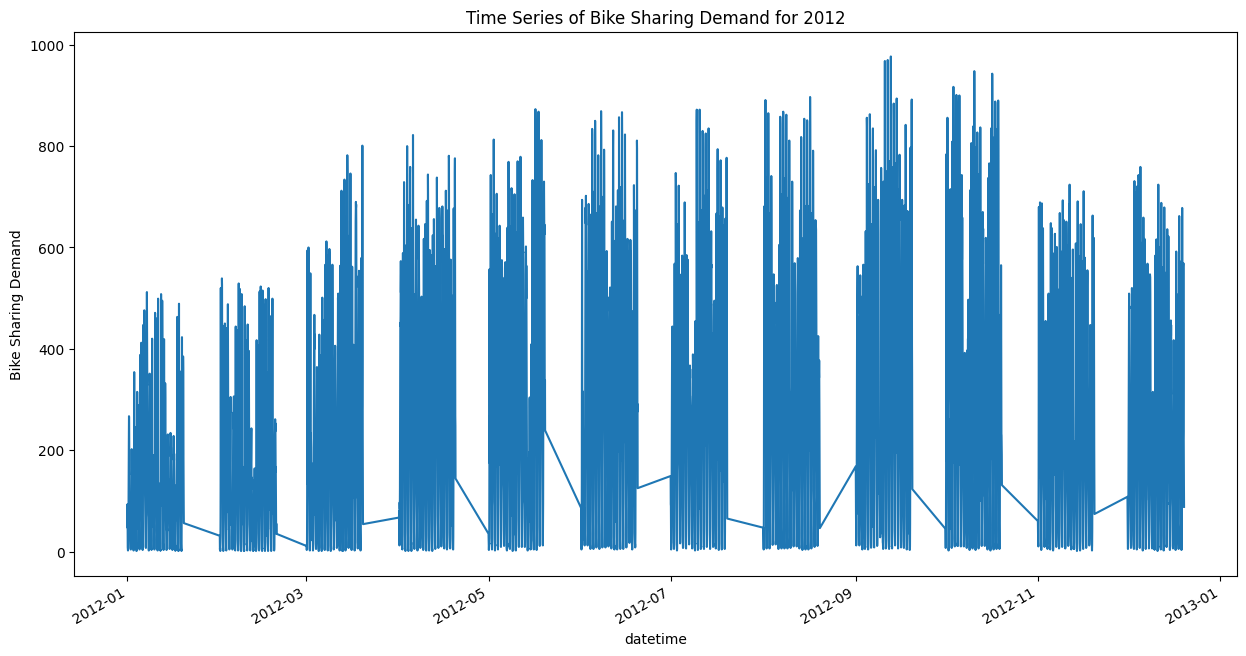

In [39]:
plt.figure(figsize=(15,8))
train_series_2012['count'].plot()
plt.ylabel('Bike Sharing Demand')
plt.title('Time Series of Bike Sharing Demand for 2012')
plt.show()

In [40]:
train_series_2012_June = train_series_2012[train_series_2012['month'] == 6]

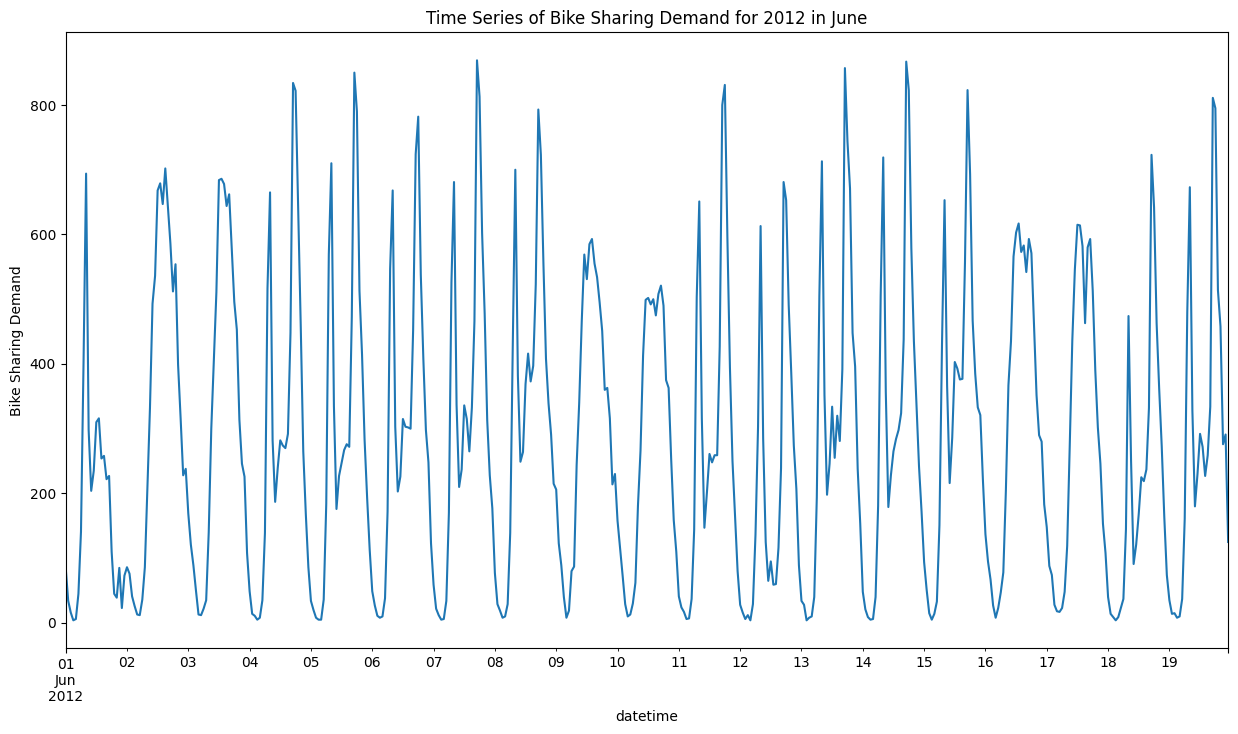

In [41]:
plt.figure(figsize=(15,8))
train_series_2012_June['count'].plot()
plt.ylabel('Bike Sharing Demand')
plt.title('Time Series of Bike Sharing Demand for 2012 in June')
plt.show()

The time series plot shows that the demand for bike rentals is generally higher in the summer months (June, July, August) and lower in the winter months (December, January, February). This makes sense as people are more likely to rent bikes in the summer months when the weather is warmer.Also, the demand for bike rentals is higher on working days than on non-working days and it is higher during the day than at night. In general, the tendency is showin an increased over the years.

## Step 5: Rerun the model with the same settings as before, just with more features

In [58]:
predictor_new_features = TabularPredictor(label = 'count', 
                             eval_metric='root_mean_squared_error',
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
                                                                                               time_limit=600, 
                                                                                               presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230528_222320\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230528_222320\"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to pre

In [69]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -33.765692       1.680562  7.714237                0.001000           0.096300            3       True          8
1    ExtraTreesMSE_BAG_L2  -33.798217       1.257747  4.095190                0.443486           1.189847            2       True          7
2  RandomForestMSE_BAG_L2  -34.330565       1.236076  6.428090                0.421816           3.522747            2       True          6
3     WeightedEnsemble_L2  -36.986071       0.797804  3.001022                0.001000           0.121008            2       True          5
4  RandomForestMSE_BAG_L1  -38.306198       0.379056  1.979222                0.379056           1.979222            1       True          3
5    ExtraTreesMSE_BAG_L1  -38.309673       0.399265  0.870453                0.399265      

C:\Users\amor_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'RandomForestMSE_BAG_L1': -38.30619795193834,
  'ExtraTreesMSE_BAG_L1': -38.3096734839321,
  'WeightedEnsemble_L2': -36.986070912292206,
  'RandomForestMSE_BAG_L2': -34.33056522585375,
  'ExtraTreesMSE_BAG_L2': -33.798217220461716,
  'WeightedEnsemble_L3': -33.765691930140996},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels\\ag-20230528_222320\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeigh

<Axes: xlabel='model'>

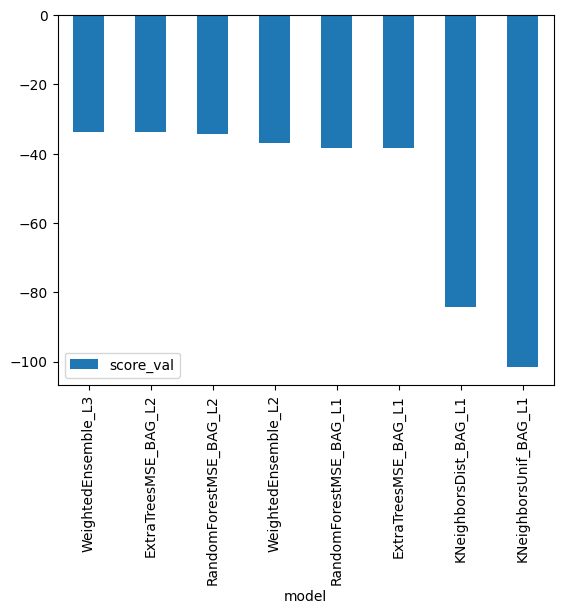

In [64]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [70]:
new_predictions = predictor_new_features.predict(test)
new_predictions.head()

0    17.449615
1    12.032564
2     9.686922
3     4.800513
4     2.968462
Name: count, dtype: float32

In [71]:
# Describe the `predictions` series to see if there are any negative values
new_predictions.describe()

count    6493.000000
mean      166.912445
std       145.726715
min         2.292308
25%        51.943329
50%       133.028458
75%       237.154358
max       849.386658
Name: count, dtype: float64

In [72]:
# How many negative values do we have?
negative_count = len([prediction for prediction in new_predictions if prediction < 0])
negative_count

0

In [ ]:
# Set them to zero
#There is 0 values negatives so I don't need to tranform them but just in case here there is the way to do it
#predictions[predictions<0] = 0

In [73]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
#!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

In [ ]:
#!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.64167`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [74]:
hp_tune_kwargs = {
    'num_trials': 20, 
    'scheduler' : 'local',
    'searcher': 'random',  # options: 'random', 'bayesopt', 'skopt', 'grid'
}

hyperparameters = {  # hyperparameters of each model type
    'GBM': {'num_boost_round': 100, 'num_leaves': 2**3},  
    'RF': {'n_estimators': 100},
}

In [75]:
predictor_new_hpo = TabularPredictor(label = 'count', 
                             eval_metric='root_mean_squared_error',
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
                                                                                               time_limit=600, 
                                                                                               presets="best_quality",
                                                                                               hyperparameters=hyperparameters, 
                                                                                               hyperparameter_tune_kwargs= hp_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels\ag-20230530_173151\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230530_173151\"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to pre

In [76]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForest_BAG_L1 -38.880969       0.000000  1.961648                0.000000           1.961648            1       True          1
1  WeightedEnsemble_L2 -38.880969       0.002027  1.979833                0.002027           0.018185            2       True          2
2  WeightedEnsemble_L3 -40.690480       0.000000  4.622096                0.000000           0.018609            3       True          4
3  RandomForest_BAG_L2 -40.690480       0.000000  4.603487                0.000000           2.641839            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_RF', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, special dtype

C:\Users\amor_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest_BAG_L1': -38.88096918850824,
  'WeightedEnsemble_L2': -38.88096918850824,
  'RandomForest_BAG_L2': -40.69048019623975,
  'WeightedEnsemble_L3': -40.69048019623975},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForest_BAG_L1': 'AutogluonModels\\ag-20230530_173151\\models\\RandomForest_BAG_L1\\',
  'WeightedEnsemble_L2': 'AutogluonModels\\ag-20230530_173151\\models\\WeightedEnsemble_L2\\',
  'RandomForest_BAG_L2': 'AutogluonModels\\ag-20230530_173151\\models\\RandomForest_BAG_L2\\',
  'WeightedEnsemble_L3': 'AutogluonModels\\ag-20230530_173151\\models\\WeightedEnsemble_L3\\'},
 'model_fit_times': {'RandomForest_BAG_L1': 1.9616479873657227,
  'WeightedEnsemble_L2': 0.01818537712097168,
  'RandomForest_BAG_L2': 2.6418385

<Axes: xlabel='model'>

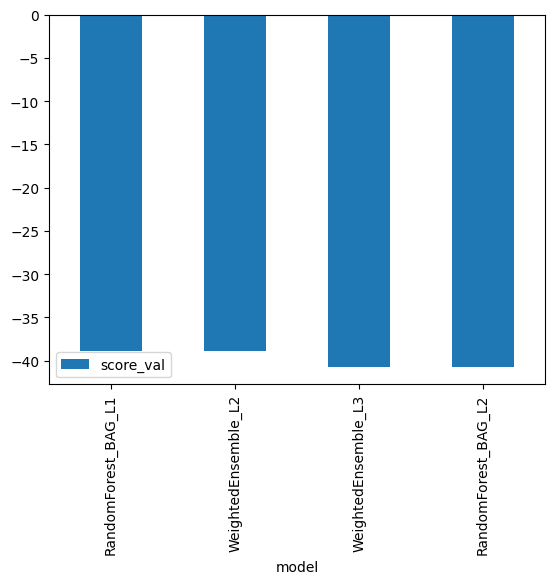

In [77]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [78]:
new_predictions_hpo = predictor_new_hpo.predict(test)
new_predictions_hpo.head()

0    14.79
1     6.35
2     3.99
3     3.23
4     3.01
Name: count, dtype: float32

In [79]:
# Describe the `predictions` series to see if there are any negative values
new_predictions_hpo.describe()

count    6493.000000
mean      196.068924
std       174.063599
min         2.200000
25%        51.200001
50%       156.509995
75%       288.109985
max       899.599976
Name: count, dtype: float64

In [80]:
# How many negative values do we have?
negative_count = len([prediction for prediction in new_predictions_hpo if prediction < 0])
negative_count

0

In [ ]:
# Set them to zero
#There is 0 values negatives so I don't need to tranform them but just in case here there is the way to do it
#predictions[predictions<0] = 0

In [81]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
#!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
#!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.4998`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

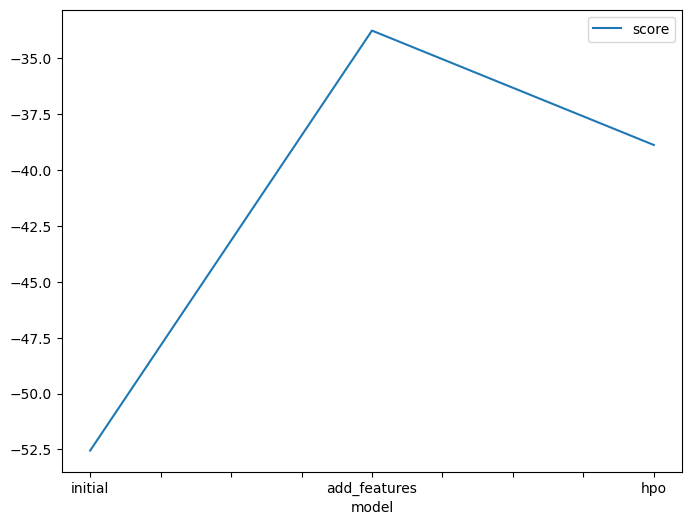

In [82]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.549823, -33.765692 , -38.880969]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

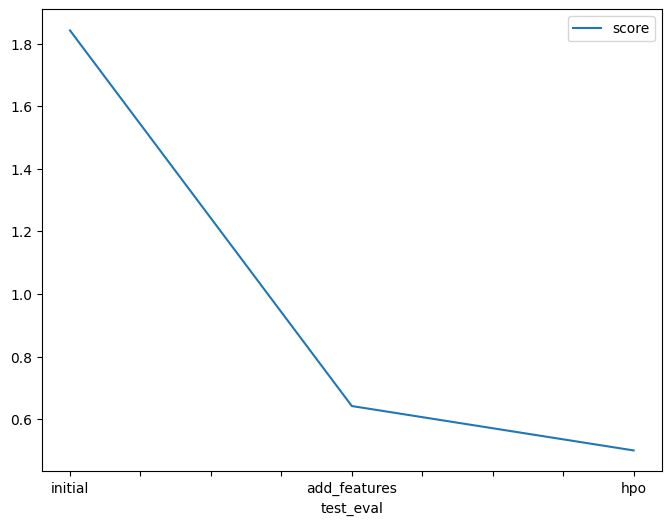

In [83]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84216, 0.64167, 0.4998]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [84]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": [600, 600, 600],
    "presets": ['best_quality', 'best_quality', 'best_quality'],
    "hp": ['None', 'EDA before and cleaning', 'num_trials: 20, scheduler : local, searcher: random'],
    "score": [1.84216, 0.64167, 0.4998]
})

,model,timelimit,presets,hp,score
0,initial,600,best_quality,None,1.84216
1,add_features,600,best_quality,EDA before and cleaning,0.64167
2,hpo,600,best_quality,"num_trials: 20, scheduler : local, searcher: r...",0.49980
